# **<center style="color: green;">Desafío - Introducción al Machine Learning</center>**

### **Nombre:** Cristian Tobar Morales ###
### **Curso:** Machine Learning ###

# **Descripción**
El siguiente desafío consta de dos partes: una de 5 preguntas conceptuales, y otra en la que
pondremos a prueba tus habilidades en la implementación de modelos de Machine
Learning, específicamente en el área de regresión lineal. El objetivo es desarrollar un modelo
que pueda predecir el precio de las casas en función de sus características.


## Parte I
Responde las siguientes preguntas:

**1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?** 

-	El `aprendizaje supervisado` busca descubrir la relación y/o patrones existentes entre variables de entrada y de salida, mientras el `no supervisado` busca descubrir relaciones entre variables de entrada sin una guía del aprendizaje.

-	El `supervisado` aplica para set de datos etiquetados, sin embargo, el `no supervisado` para set de datos sin etiquetas. 

-	*En relación al tipo de aprendizaje:*  
El `supervisado`, puede realizar tareas de clasificación y regresión.  
EL `no supervisado`, realiza tareas de reducción de dimensiones y clustering o agrupamiento. 

-	*Métricas de evaluación:*  
El `supervisado`: Accuracy, precisión, recall, F1-score, Roc-AUC, R2, MAE, MSE, RMSE y MAPE.  
El `no supervisado`: Coeficiente de Silhouette, inercia y Davies-Bouldin index. 

**2. En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?**

El mejor método idóneo para construir un modelo predictivo mediante un diagnóstico de enfermo o no enfermo, es mediante un aprendizaje supervisado con el método de clasificación.

Se selecciona el aprendizaje supervisado, puesto que cuenta con variables x e y.
-	X: Síntomas, antecediste médicos estilo de vida. 
-	Y: Enfermo o no enfermo. 

La variable y, es del tipo discreta, la cual es recomendable a utilizar el método de clasificación. 

**3. ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?**

Es necesario dividir el set de datos para evitar los errores comunes como sobreajuste o evaluar con los mismos datos con los que se entreno el modelo, el objetivo principal es para poder estimar los parámetros de algoritmo en el test de entrenamiento y testear cual es el poder predictivo del algoritmo en datos nuevos, no visto anteriormente. 

**4. ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?**

La diferencia principal radica principalmente en la conclusión final del estudio, puesto que el enfoque estadístico tiene como objetivo estimar y probar hipótesis, y realizar test, mientras que en machine learning el foco principal es minimizar el error en los datos. 

**5. Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).**


El área de interés o rubro de trabajo corresponde al área de la salud. 

Menciona al menos 1 aplicación en esa industria de:

*a.	Aprendizaje Supervisado (Clasificación)*  
Para predecir si un paciente está enfermo o no.

*b.	Aprendizaje Supervisado (Regresión)*  
Indicar que variables (Presión, actividad física, edad, IMC, fumar, etc.) tiene un efecto significativo en la probabilidad de una enfermedad. 

*c.	Aprendizaje No Supervisado (Clustering)*  
Agrupamiento de pacientes con perfiles fisiológicos o estilos de vida similares, permitiendo diseñar planes de prevención y tratamiento anticipados. 

*d.	Aprendizaje No Supervisado (Reducción de dimensionalidad)*  
Estudiar historias clínicas de pacientes (Edad, signos vitales, test de laboratorio, etc.), la cual consta de muchas variables de estudio. 

## Parte II
En este ejemplo, utilizaremos Python y la biblioteca Scikit-learn para construir y entrenar
nuestro modelo de regresión lineal. A continuación, se presenta un paso a paso para llevar a
cabo este desafío:

### Librerías 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Cargar el DataSet y Exploración inicial

In [18]:
# Cargar el archivo
df = pd.read_excel('data-housing.xlsx', engine="openpyxl")

# Mostrar Dataset
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


In [19]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   guestroom        545 non-null    object
 6   hotwaterheating  545 non-null    object
 7   airconditioning  545 non-null    object
 8   parking          545 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.4+ KB


###  Tratamiento de outliers (valores atípicos)

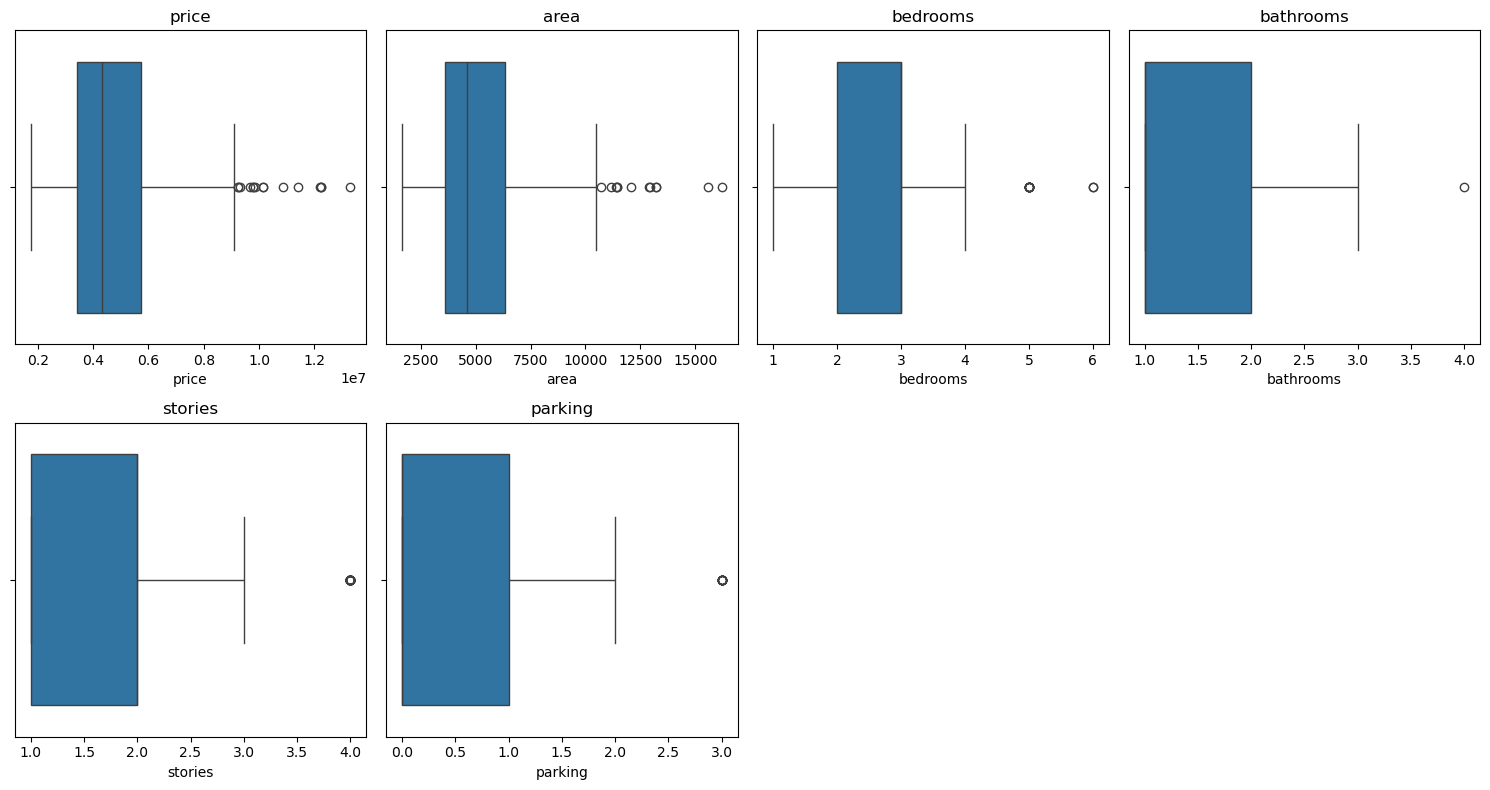

In [13]:
# Selección solo de columnas numéricas
numericas = df.select_dtypes(include='int64')

# Creamos el boxplots para cada uno
plt.figure(figsize=(15, 8))
for i, col in enumerate(numericas.columns, 1):
    plt.subplot(2, len(numericas.columns)//2 + 1, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Interpretación:  
De acuerdo a los boxplot de cada variable numérica del dataset, se puede apreciar los valores atípicos, en conclusión, no es recomendable eliminar dichos valores puesto que no presenta gran interferencia y de acuerdo a las variables puede ser un valor realista de la data y no distorsionaran el modelo, dejarlos puede enriquecer la calidad del análisis.  

### Codificación de variables categóricas
Los modelos estadísticos y de machine learning no pueden trabajar directamente con datos de tipo texto, por eso necesitamos **codificar** las variables categóricas en formato numérico.

Se aplica Label encoding, para las variables categóricas (guestroom, hotwaterheating y airconditioning). 
Donde:
0: Si
1: No

In [20]:
def aplicar_label_encoding(df, mapeos):
    for col, mapa in mapeos.items():
        df[col] = df[col].map(mapa)
    return df

mapeos = {
    "guestroom":{
        "yes": 0,
        "no": 1
    },
    "hotwaterheating":{
        "yes": 0,
        "no": 1 
    },
    "airconditioning":{
        "yes": 0,
        "no": 1 
    }
}   

df = aplicar_label_encoding(df, mapeos) 

In [21]:
# Imprimir Dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,1,0,2
1,12250000,8960,4,4,4,1,1,0,3
2,12250000,9960,3,2,2,1,1,1,2
3,12215000,7500,4,2,2,1,1,0,3
4,11410000,7420,4,1,2,0,1,0,2


### Visualización 

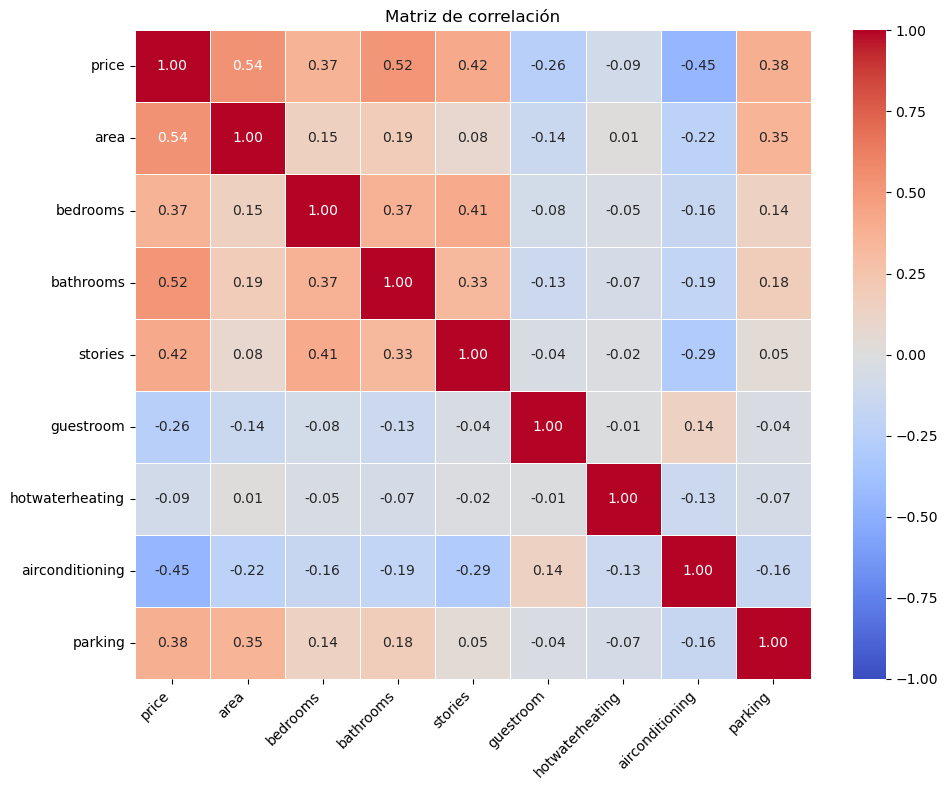

In [23]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

Interpretación:
